In [ ]:
%pip install seaborn

In [ ]:
# Importing the required libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing the required csv data set named Data1
df=pd.read_csv("Data2.csv")
df.describe()

In [ ]:
df.info()

In [7]:
df.drop(["PLCtime"], axis=1, inplace=True)
df

,Linespeed,Extrspeed_1,Extrtemp_1,Extrtempbarr_1_1,Extrpressure_1_1,Extrpressure_1_2,Extrtempstock_1
0,21.27899,5.498138,70.08289,42.12890,18.48597,41.82581,88.2
1,20.28009,7.369019,69.95557,45.85973,21.68692,46.85149,88.3
2,20.13654,7.366974,69.94476,44.37809,21.63629,46.33247,88.2
3,20.36981,7.369019,70.10267,42.21057,21.72309,45.94003,88.2
4,20.41766,7.369019,69.98849,45.74596,21.74479,45.54760,88.2
...,...,...,...,...,...,...,...
4594,0.00000,0.000000,70.08470,45.01451,0.00000,0.00000,75.2
4595,0.00000,0.000000,69.84895,45.01500,0.00000,0.00000,75.3
4596,0.00000,0.000000,69.96615,45.01668,0.00000,0.00000,75.5
4597,0.00000,0.000000,70.17184,45.00829,0.00000,0.00000,75.2


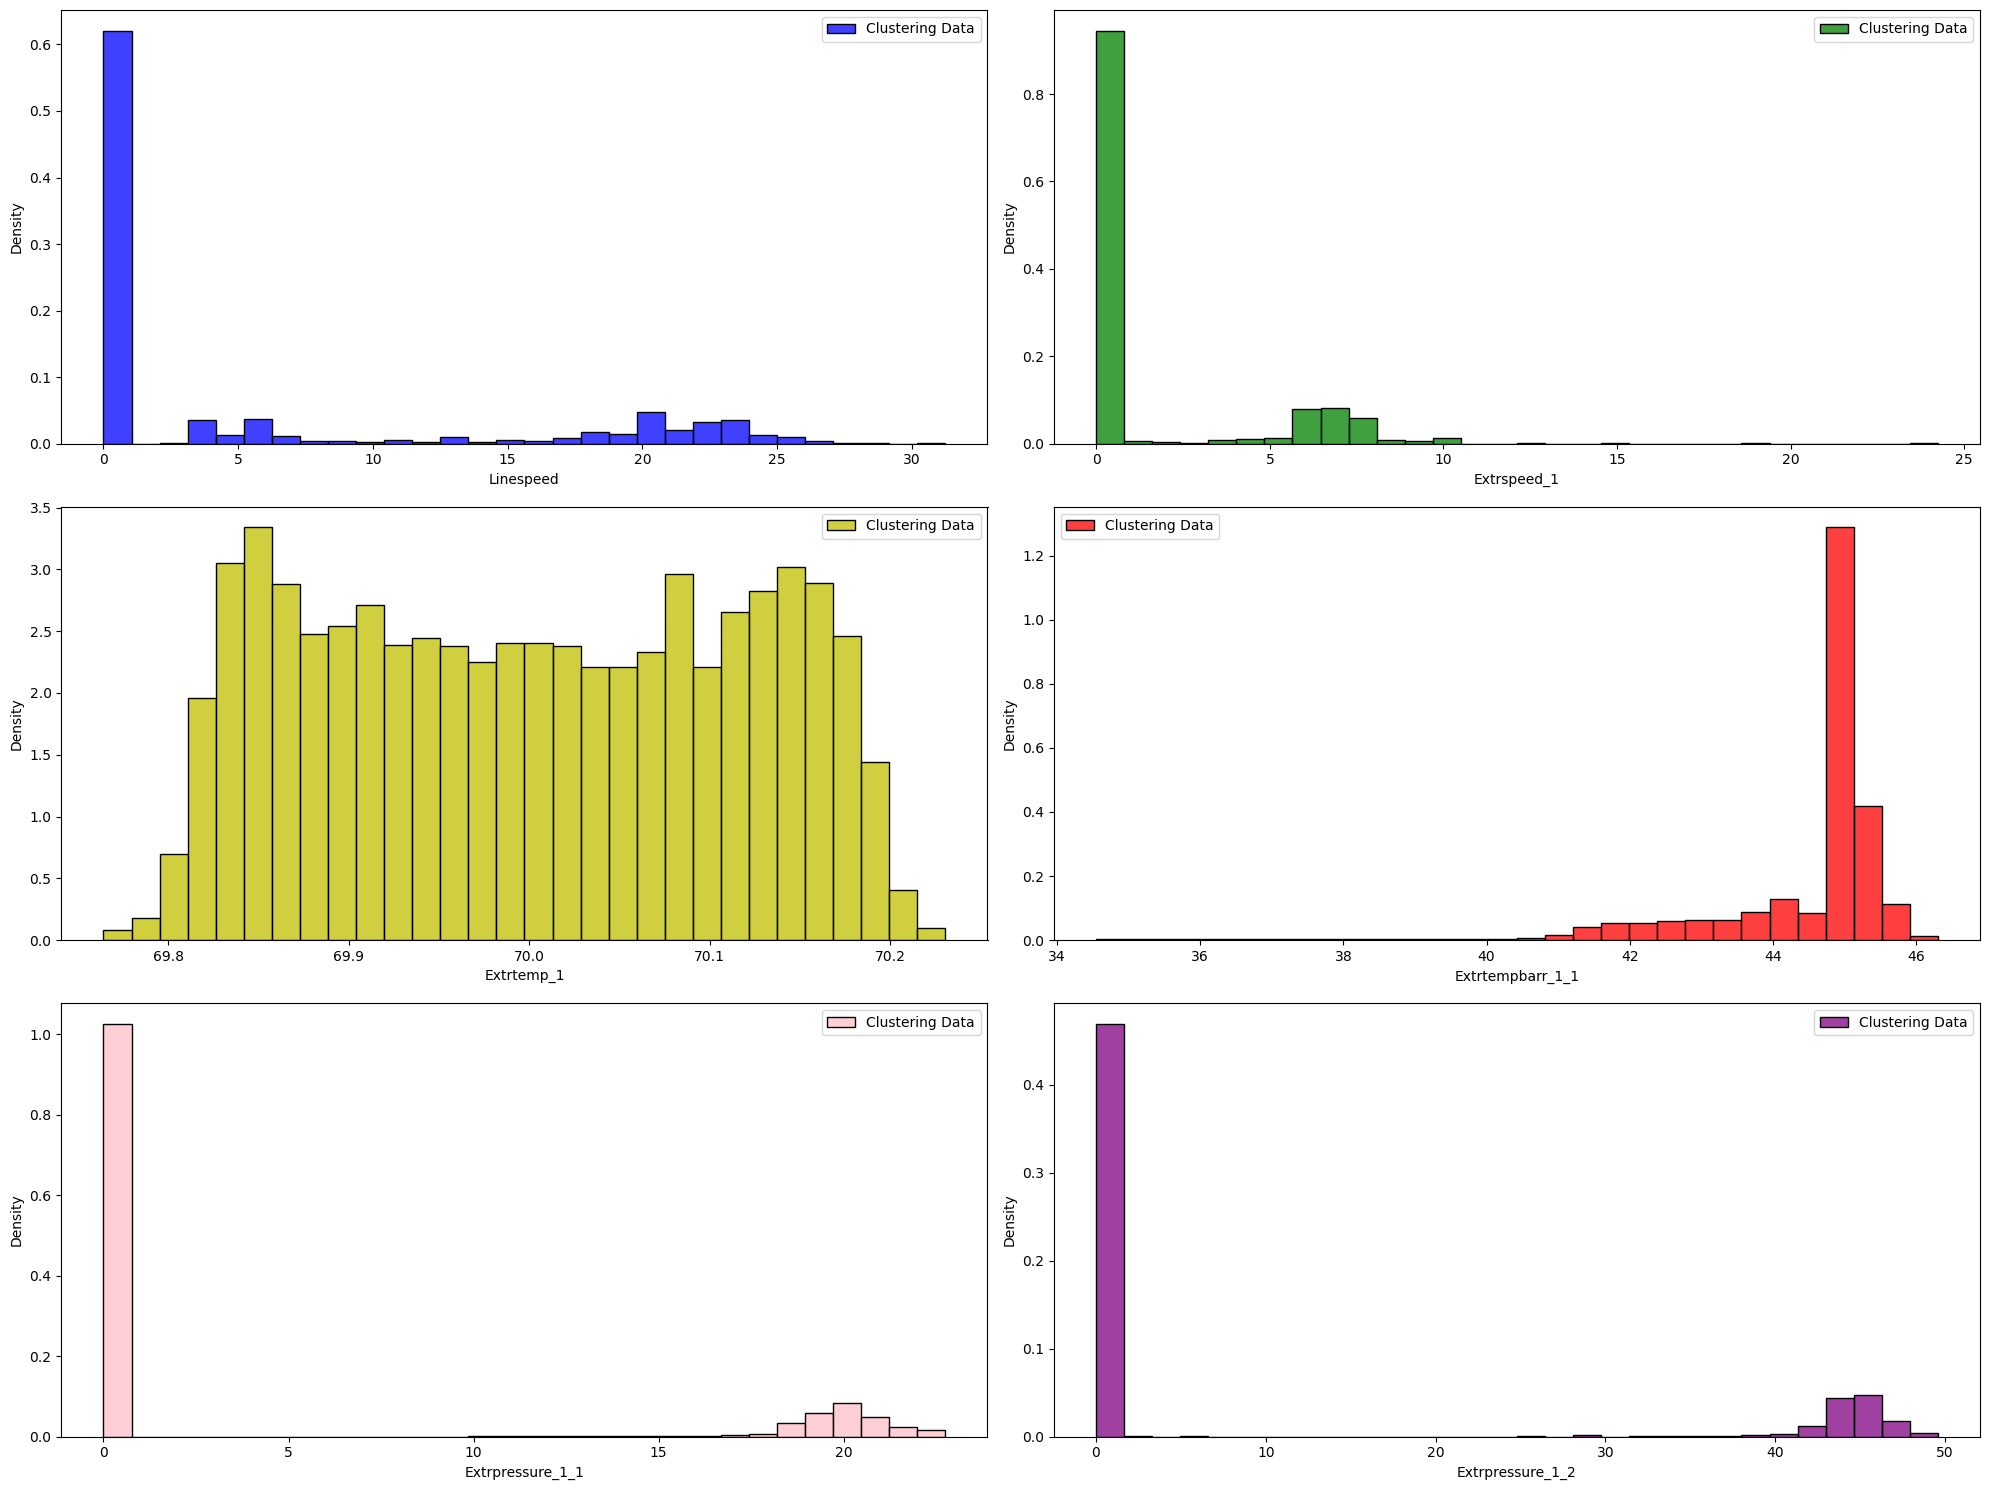

In [8]:
# Create a figure for our subplots
fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(3, 2, 1)
sns.histplot(df["Linespeed"], label="Clustering Data", color="b", stat="density", bins=30, ax=ax1)
ax1.legend()

ax2 = fig.add_subplot(3, 2, 2)
sns.histplot(df["Extrspeed_1"], label="Clustering Data", color="g", stat="density", bins=30, ax=ax2)
ax2.legend()

ax3 = fig.add_subplot(3, 2, 3)
sns.histplot(df["Extrtemp_1"], label="Clustering Data", color="y", stat="density", bins=30, ax=ax3)
ax3.legend()

ax4 = fig.add_subplot(3, 2, 4)
sns.histplot(df["Extrtempbarr_1_1"], label="Clustering Data", color="r", stat="density", bins=30, ax=ax4)
ax4.legend()

ax5 = fig.add_subplot(3, 2, 5)
sns.histplot(df["Extrpressure_1_1"], label="Clustering Data", color="pink", stat="density", bins=30, ax=ax5)
ax5.legend()

ax6 = fig.add_subplot(3, 2, 6)
sns.histplot(df["Extrpressure_1_2"], label="Clustering Data", color="purple", stat="density", bins=30, ax=ax6)
ax6.legend()

plt.tight_layout()
plt.show()


<ipython-input-9-07bf40d2f117>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Linespeed"], label="Clustering Data", color="b", ax=axes[0,0])
<ipython-input-9-07bf40d2f117>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Extrspeed_1"], label="Clustering Data", color="g", ax=axes[0,1])


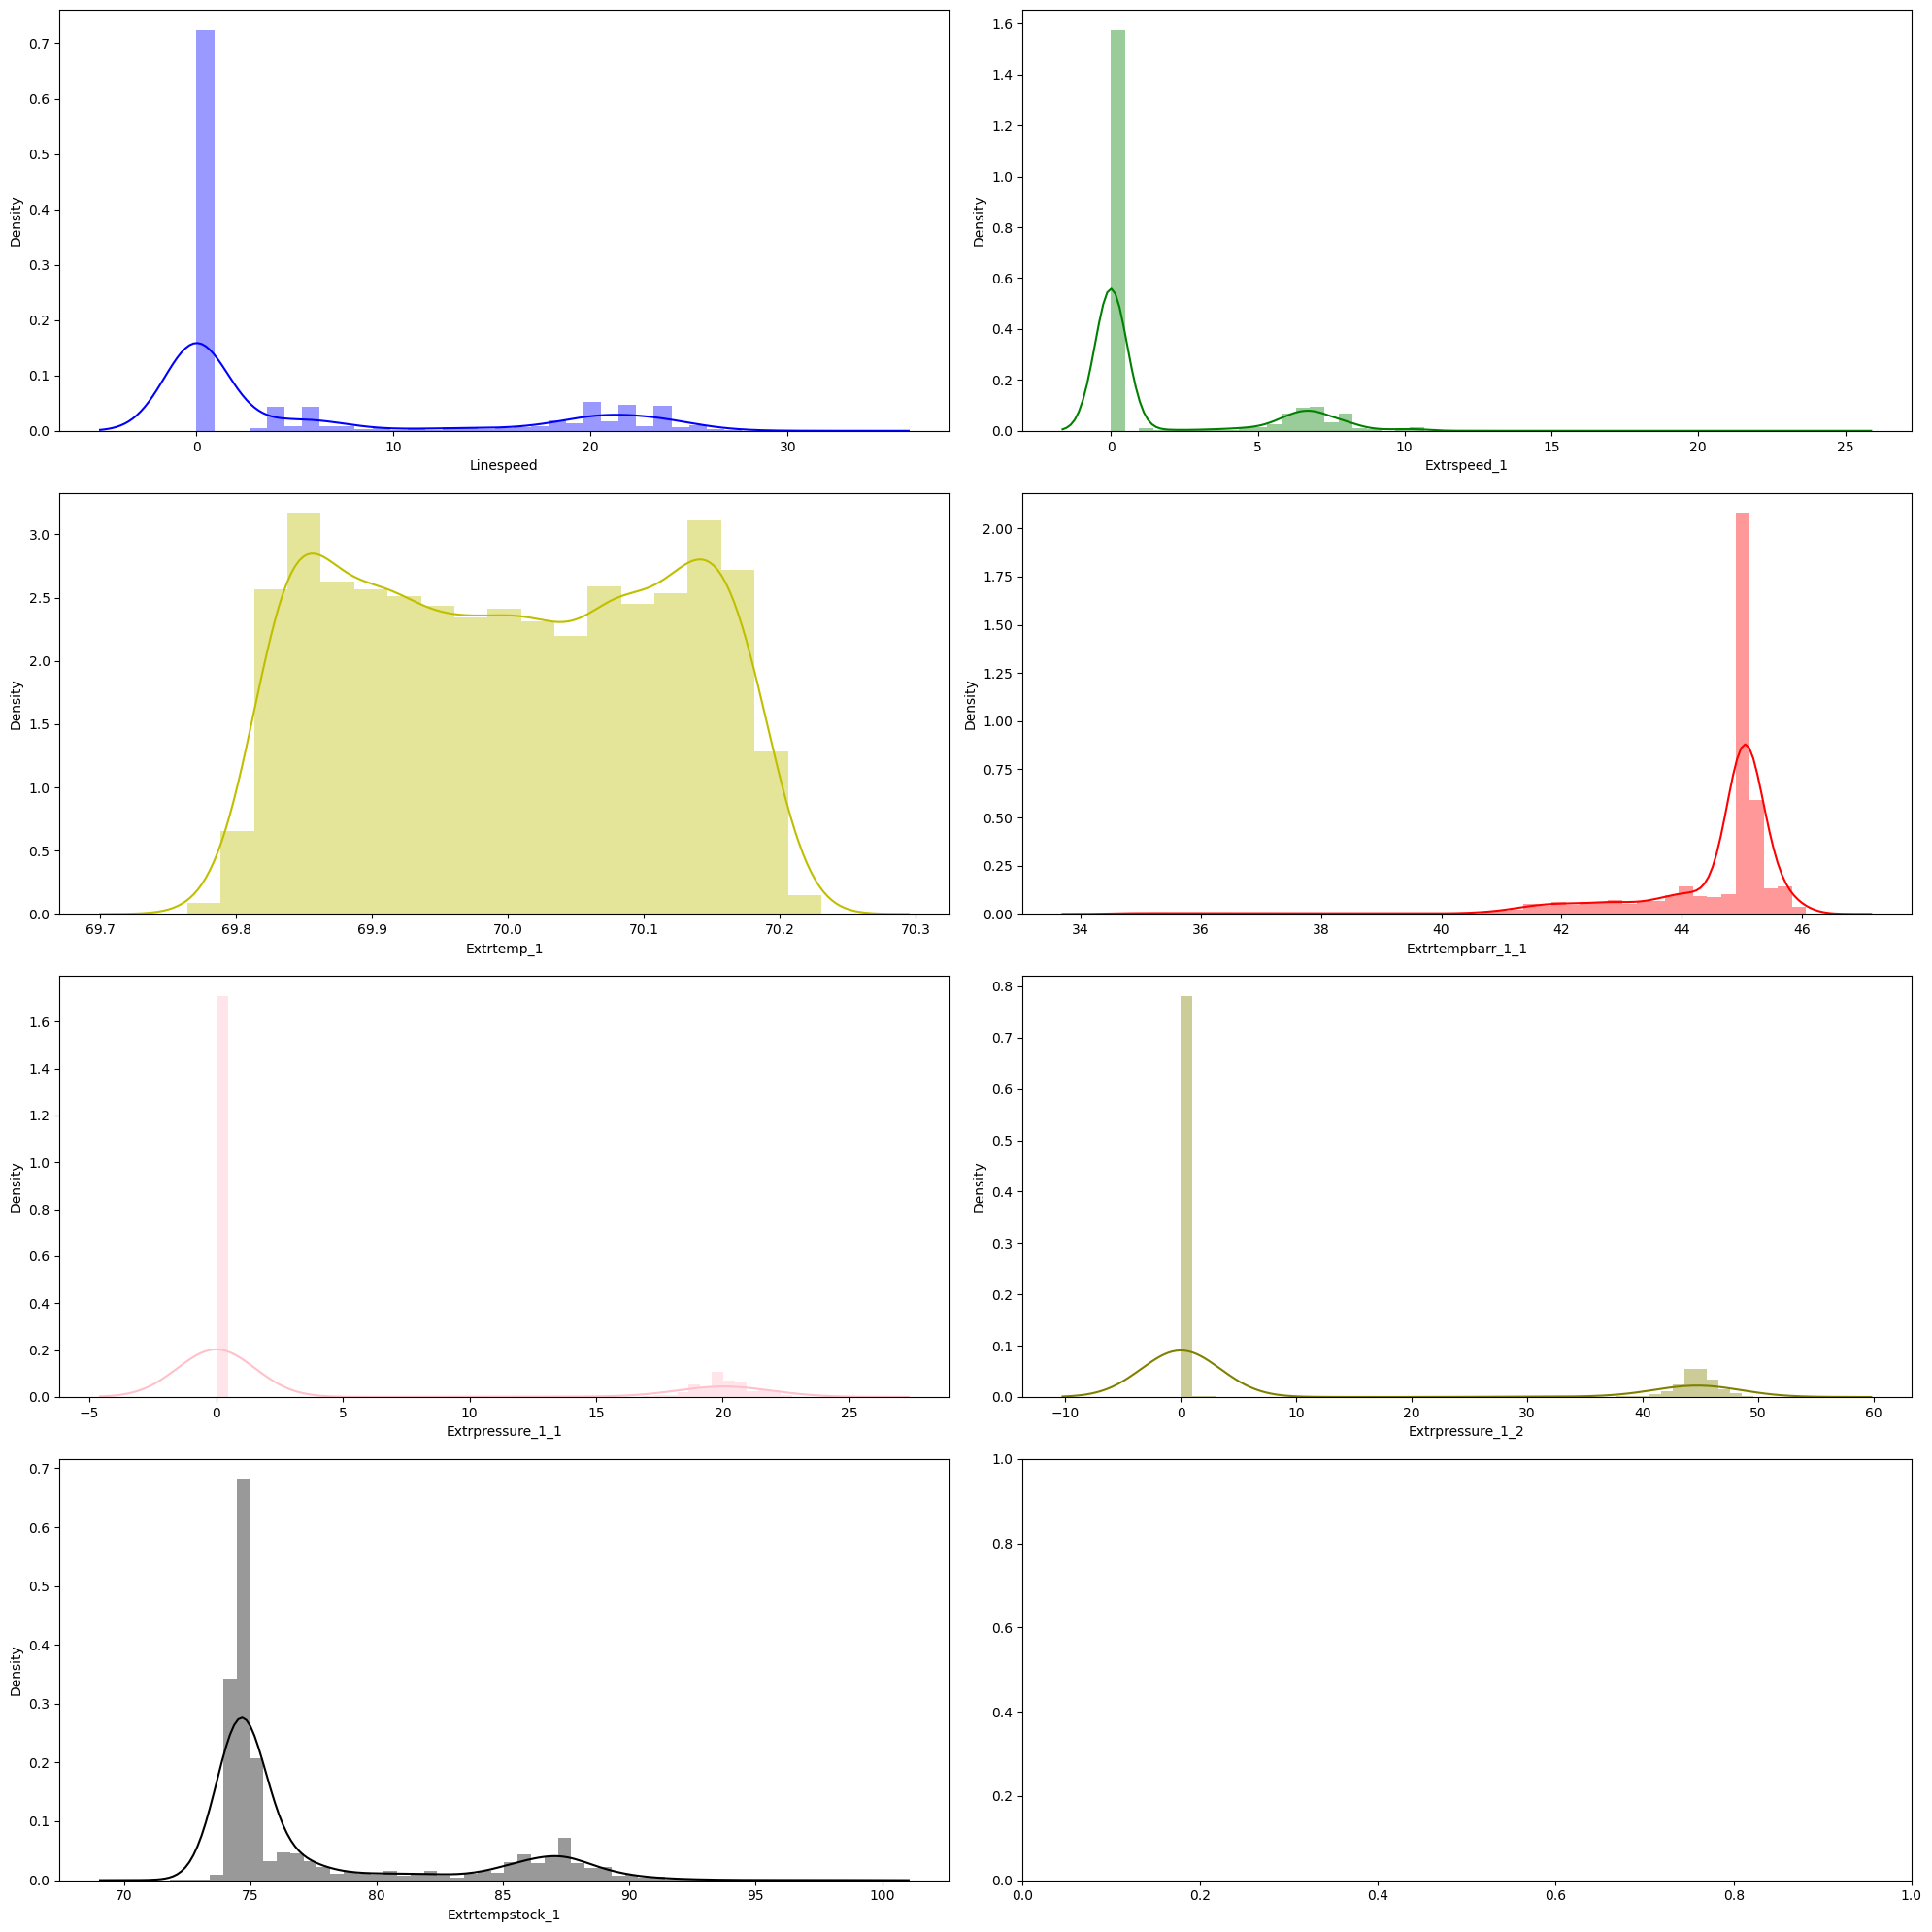

In [9]:
#visualize the distribution of each parameter
#Below is for showing the distribution of gamma ray.
f, axes=plt.subplots (4, 2, figsize=(20,20))

sns.distplot(df["Linespeed"], label="Clustering Data", color="b", ax=axes[0,0])
sns.distplot(df["Extrspeed_1"], label="Clustering Data", color="g", ax=axes[0,1])
sns.distplot(df["Extrtemp_1"], label="Clustering Data", color="y", ax=axes[1,0])
sns.distplot(df["Extrtempbarr_1_1"], label="Clustering Data", color="r", ax=axes[1,1])
sns.distplot(df["Extrpressure_1_1"], label="Clustering Data", color="pink", ax=axes[2,0])
sns.distplot(df["Extrpressure_1_2"], label="Clustering Data", color="olive", ax=axes[2,1])
sns.distplot(df["Extrtempstock_1"], label="Clustering Data", color="black", ax=axes[3,0])
plt.tight_layout()

Linespeed           float64
Extrspeed_1         float64
Extrtemp_1          float64
Extrtempbarr_1_1    float64
Extrpressure_1_1    float64
Extrpressure_1_2    float64
Extrtempstock_1     float64
dtype: object


<AxesSubplot:>

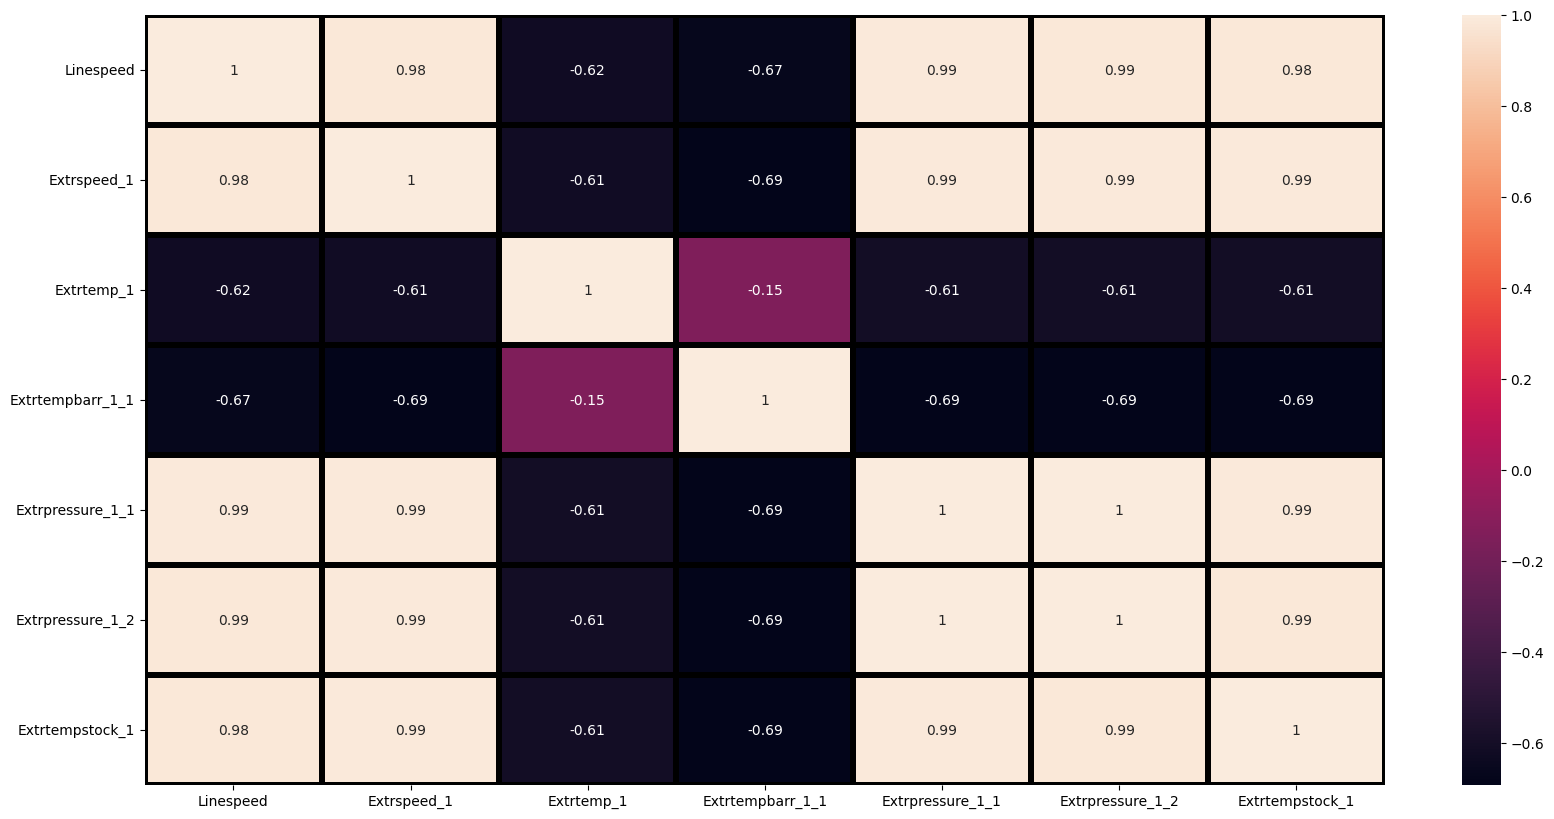

In [10]:
#Ploting Heat Map of all parameters to find potential collinear features
fig= plt.figure(figsize=(20,10))
print(df.dtypes)
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr().corr(), annot=True, linewidths=4, linecolor='black')

In [11]:
#Importing the StandarsScaler library and Standardize the data proior to feeding the data into the K-Means Algorithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[ 1.7791742 ,  1.33516873,  0.71350779, ...,  1.70762668,
         1.73633459,  2.15992331],
       [ 1.6658522 ,  1.96959956, -0.38710924, ...,  2.09534911,
         2.00908718,  2.18014395],
       [ 1.64956692,  1.96890609, -0.48055622, ...,  2.08921643,
         1.98091904,  2.15992331],
       ...,
       [-0.63485891, -0.52929419, -0.29565049, ..., -0.53152895,
        -0.53362645, -0.40809727],
       [-0.63485891, -0.52929419,  1.48243556, ..., -0.53152895,
        -0.53362645, -0.46875917],
       [-0.63485891, -0.52929419,  0.28655621, ..., -0.53152895,
        -0.53362645, -0.38787663]])

K=1, Inertia=32192.999999999975
K=2, Inertia=12039.489591943133
K=3, Inertia=8779.961552044588
K=4, Inertia=6347.1913035008565
K=5, Inertia=5688.216255561491
K=6, Inertia=5065.485137646821
K=7, Inertia=4625.819035667422
K=8, Inertia=4221.687399130076
K=9, Inertia=3825.3298860339837
Number of distortions recorded: 9


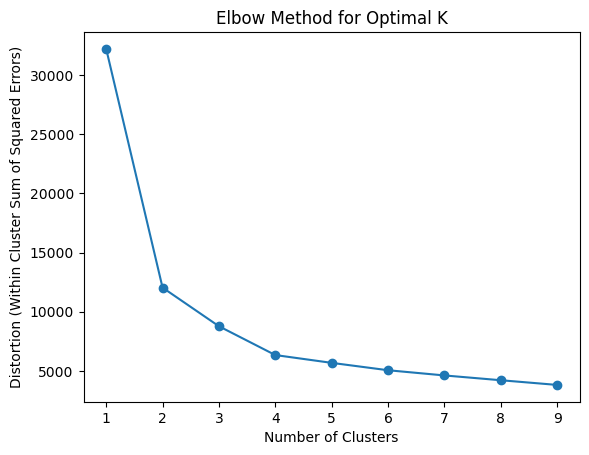

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []

for i in range(1, 10):
    try:
        km = KMeans(n_clusters=i, random_state=1000, init='k-means++', n_init=1000, max_iter=500)
        km.fit(df_scaled)
        distortions.append(km.inertia_)
        print(f'K={i}, Inertia={km.inertia_}')
    except Exception as e:
        print(f'Error with K={i}: {e}')

# Check the length of distortions
print(f'Number of distortions recorded: {len(distortions)}')

# Proceed to plot if we have the correct number of distortions
if len(distortions) == 9:
    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
    plt.title('Elbow Method for Optimal K')
    plt.show()
else:
    print('Could not plot due to mismatch in lengths.')


In [13]:
print(distortions)

[32192.999999999975, 12039.489591943133, 8779.961552044588, 6347.1913035008565, 5688.216255561491, 5065.485137646821, 4625.819035667422, 4221.687399130076, 3825.3298860339837]


In [14]:
 n=10
 kmeans=KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
 kmeans= kmeans.fit(df_scaled)
 print(kmeans.cluster_centers_)

[[ 1.74241816 -0.52929419 -0.09492278  0.1975184  -0.53152895 -0.53362645
  -0.01101942]
 [ 1.80117591  1.86998904 -0.02667635  0.54070462  1.910088    1.89570074
   1.88855459]
 [-0.63485891 -0.52929419 -0.00722456 -4.98367045 -0.53152895 -0.53362645
  -0.50497831]
 [-0.53673144 -0.52929726  1.19470257  0.32243322 -0.53152895 -0.53286525
  -0.50363521]
 [ 1.7580765   1.78531727  0.05675929 -1.10834847  1.90773948  1.89930561
   1.79702571]
 [-0.54328587 -0.52929481 -1.19952874  0.29976922 -0.53152895 -0.53322348
  -0.51576527]
 [ 0.63652451  0.62626627 -0.04052194 -0.17506468  1.50144618  1.62285106
   0.02492044]
 [-0.52256785 -0.52656744  0.04435434 -1.56881304 -0.52206153 -0.52189084
  -0.32513521]
 [-0.26355559  2.18345185  0.00902401 -0.03143979 -0.53152895 -0.52217213
   0.13553973]
 [-0.5337277  -0.52930028 -0.01832285  0.34392375 -0.53152895 -0.5325903
  -0.493445  ]]


In [15]:
labels=kmeans.labels_
labels

array([4, 1, 1, ..., 9, 3, 9])

In [120]:
df_scaled= pd.DataFrame(df_scaled, columns=df.columns[0:7])
df_scaled['clusters']= labels
df_scaled

,Linespeed,Extrspeed_1,Extrtemp_1,Extrtempbarr_1_1,Extrpressure_1_1,Extrpressure_1_2,Extrtempstock_1,clusters
0,9.102123e+07,12224.426129,79.036965,108.671309,157.033487,780.653698,513.759489,4
1,8.688738e+07,15855.684311,79.035260,114.360363,183.465564,873.275927,514.254141,1
2,8.629332e+07,15851.715100,79.035116,112.101045,183.047483,863.710498,513.759489,1
3,8.725868e+07,15855.684311,79.037229,108.795846,183.764241,856.477911,513.759489,4
4,8.745670e+07,15855.684311,79.035701,114.186878,183.943430,849.245508,513.759489,1
...,...,...,...,...,...,...,...,...
4594,2.960294e+06,1552.898330,79.036989,113.071507,4.384245,9.812783,449.454745,3
4595,2.960294e+06,1552.898330,79.033833,113.072254,4.384245,9.812783,449.949397,5
4596,2.960294e+06,1552.898330,79.035402,113.074816,4.384245,9.812783,450.938701,9
4597,2.960294e+06,1552.898330,79.038155,113.062023,4.384245,9.812783,449.454745,3


In [134]:
df_scaled['Linespeed']=(df_scaled['Linespeed']*(df['Linespeed'].std())+ df['Linespeed'].mean())

df_scaled['Extrspeed_1']=(df_scaled['Extrspeed_1']*(df['Extrspeed_1'].std())+df['Extrspeed_1'].mean())

df_scaled['Extrtemp_1']=(df_scaled['Extrtemp_1']*(df['Extrtemp_1'].std())+df['Extrtemp_1'].mean())

df_scaled['Extrtempbarr_1_1'] = (df_scaled['Extrtempbarr_1_1'] * (df['Extrtempbarr_1_1'].std()) + df['Extrtempbarr_1_1'].mean())
                                 
df_scaled['Extrpressure_1_1'] = (df_scaled['Extrpressure_1_1'] * (df['Extrpressure_1_1'].std()) + df['Extrpressure_1_1'].mean())
 
df_scaled['Extrpressure_1_2']=(df_scaled['Extrpressure_1_2']* (df['Extrpressure_1_2'].std())+df['Extrpressure_1_2'].mean())

df_scaled['Extrtempstock_1']=(df_scaled['Extrtempstock_1']* (df['Extrtempstock_1'].std())+ df['Extrtempstock_1'].mean())
df

,Linespeed,Extrspeed_1,Extrtemp_1,Extrtempbarr_1_1,Extrpressure_1_1,Extrpressure_1_2,Extrtempstock_1
0,21.27899,5.498138,70.08289,42.12890,18.48597,41.82581,88.2
1,20.28009,7.369019,69.95557,45.85973,21.68692,46.85149,88.3
2,20.13654,7.366974,69.94476,44.37809,21.63629,46.33247,88.2
3,20.36981,7.369019,70.10267,42.21057,21.72309,45.94003,88.2
4,20.41766,7.369019,69.98849,45.74596,21.74479,45.54760,88.2
...,...,...,...,...,...,...,...
4594,0.00000,0.000000,70.08470,45.01451,0.00000,0.00000,75.2
4595,0.00000,0.000000,69.84895,45.01500,0.00000,0.00000,75.3
4596,0.00000,0.000000,69.96615,45.01668,0.00000,0.00000,75.5
4597,0.00000,0.000000,70.17184,45.00829,0.00000,0.00000,75.2


In [135]:
Group_by=df_scaled.groupby(by='clusters').mean()
Group_by

,Linespeed,Extrspeed_1,Extrtemp_1,Extrtempbarr_1_1,Extrpressure_1_1,Extrpressure_1_2,Extrtempstock_1
clusters,,,,,,,
0,6.144162e+10,39855.246590,79.158250,614.793094,2807.576571,6.493610e+04,58092.559247
1,6.291011e+10,392130.134950,79.158250,617.621011,96499.782584,5.227339e+06,63714.916393
2,2.028150e+09,39855.246590,79.158250,572.099140,2807.576571,6.493610e+04,56630.540243
3,4.488730e+09,39854.796529,79.158253,615.823022,2807.576571,6.655227e+04,56634.130547
4,6.183296e+10,379698.196952,79.158250,604.032509,96409.662770,5.234999e+06,63444.009302
5,4.316765e+09,39855.155286,79.158247,615.635659,2807.576571,6.579244e+04,56598.612986
6,3.380286e+10,209520.473123,79.158250,611.722940,80818.963399,4.647524e+06,58198.933979
7,4.834554e+09,40255.601964,79.158250,600.238196,3170.869918,8.987469e+04,57162.839648
8,1.130785e+10,438154.328786,79.158250,612.906436,2807.576571,8.927693e+04,58526.344844


In [136]:
df_scaled.groupby(by='clusters').count()

,Linespeed,Extrspeed_1,Extrtemp_1,Extrtempbarr_1_1,Extrpressure_1_1,Extrpressure_1_2,Extrtempstock_1
clusters,,,,,,,
0,102,102,102,102,102,102,102
1,559,559,559,559,559,559,559
2,91,91,91,91,91,91,91
3,1131,1131,1131,1131,1131,1131,1131
4,339,339,339,339,339,339,339
5,1115,1115,1115,1115,1115,1115,1115
6,123,123,123,123,123,123,123
7,282,282,282,282,282,282,282
8,61,61,61,61,61,61,61


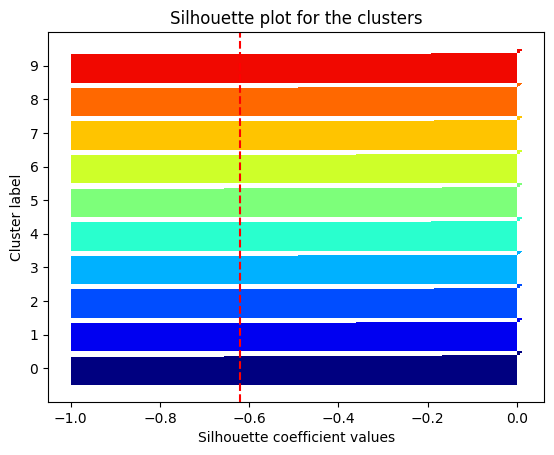

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming you have already performed K-means clustering and have 'final_km'
n_clusters = cluster_labels.shape[0]  # or however you defined it
silhouette_vals = silhouette_samples(df_scaled, labels, metric='euclidean')

y_ax_lower = 10
yticks = []

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to the current cluster
    c_silhouette_vals = silhouette_vals[labels==c]
    c_silhouette_vals.sort()

    # Determine the y-axis limits for the current cluster
    y_ax_upper = y_ax_lower + len(c_silhouette_vals)

    # Color for the current cluster
    color = cm.jet(float(i) / n_clusters)

    # Create a horizontal bar chart
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, edgecolor='none', color=color)

    # Compute the y-ticks
    yticks.append((y_ax_lower + y_ax_upper) / 2.)

    # Update the lower limit for the next cluster
    y_ax_lower += len(c_silhouette_vals)

# Average silhouette score
silhouette_avg = np.mean(silhouette_vals)

# Final plot adjustments
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, range(n_clusters))
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for the clusters")
plt.show()
